Ethan Fremder - Honors Project

CMSE 201 - Section 2

## Background and Motivation

Agriculture is a huge factor that plays into the economy. When crops do well and are available to the public, the economy thrives. When they are hard to come by, the population struggles to get by. One of the biggest crops that has been important for centuries is corn. Corn has always been one of my favorite vegetables and is a favorite in many dishes around the world. The research question for this project is:

What will the prices of corn look like in countries in Western Europe in 50 years?

## Methodology

Through data analysis and modeling, predictive models will be able to estimate the price of corn from multiple countries in Western Europe. By modeling from the given data, a prediction of the price 50 years from now should be relatively accurate.

The dataset I am using is from FAOSTAT. It contains data of corn prices per ton per US dollar from 1991-2022 by country in Western Europe. https://www.fao.org/faostat/en/#data/PP

In [2]:
#this chunk of code imports the libraries needed and reads in the dataset
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit
corn = pd.read_csv('WesternEuropeCornPrice.csv')

In [3]:
corn.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Months Code,Months,Unit,Value,Flag,Flag Description
0,PP,Producer Prices,40,Austria,5532,Producer Price (USD/tonne),112,Maize (corn),1991,1991,7021,Annual value,USD,251.0,A,Official figure
1,PP,Producer Prices,40,Austria,5532,Producer Price (USD/tonne),112,Maize (corn),1992,1992,7021,Annual value,USD,262.4,A,Official figure
2,PP,Producer Prices,40,Austria,5532,Producer Price (USD/tonne),112,Maize (corn),1993,1993,7021,Annual value,USD,249.5,A,Official figure
3,PP,Producer Prices,40,Austria,5532,Producer Price (USD/tonne),112,Maize (corn),1994,1994,7021,Annual value,USD,159.1,A,Official figure
4,PP,Producer Prices,40,Austria,5532,Producer Price (USD/tonne),112,Maize (corn),1995,1995,7021,Annual value,USD,187.9,A,Official figure


As shown by the first few lines in the data, there are a good chunk of columns to work with. The columns that are relevant in this project include 'Area', 'Item', 'Year', and 'Value'. The area specifies which country the data comes from. The item throughout this project will be corn. The years column represents which year the data comes from and the value is the price of one ton of corn in USD. 

In [4]:
#this block of code masks the data to only show data from 2000
year_mask = corn['Year'] > 1999
corn = corn[year_mask]

In [5]:
#this code chows how many years of data we have for each country
pd.value_counts(corn['Area'])

Austria                         22
France                          22
Germany                         22
Switzerland                     22
Luxembourg                      21
Netherlands (Kingdom of the)     9
Name: Area, dtype: int64

In [6]:
#this block of code masks a certain country as it does not have enough years of data to accurately find an answer
mask = corn['Area'] != 'Belgium-Luxembourg'
corn = corn[mask]

In [7]:
#this block of code filters the data and creates new dataframes by country
mask1 = corn['Area'] == 'Austria'
austria = corn[mask1]

mask2 = corn['Area'] == 'France'
france = corn[mask2]

mask3 = corn['Area'] == 'Germany'
germany = corn[mask3]

mask4 = corn['Area'] == 'Switzerland'
switzerland = corn[mask4]

mask5 = corn['Area'] == 'Luxembourg'
luxembourg = corn[mask5]

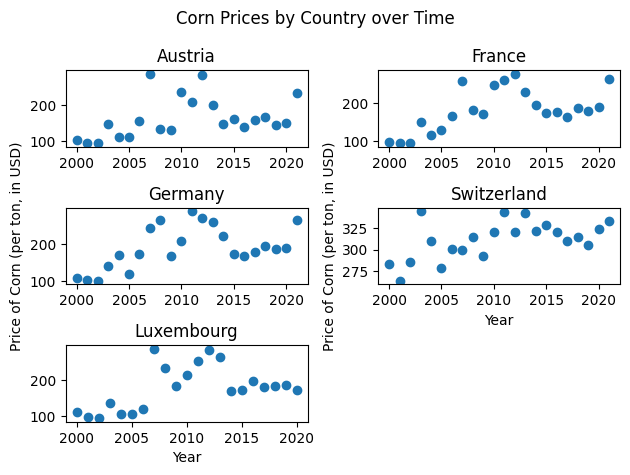

In [8]:
#this block of code creates a subplot of each of the countries corn prices over time with the data given
plt.suptitle('Corn Prices by Country over Time')
plt.subplot(3,2,1)
plt.scatter(austria['Year'], austria['Value'])
plt.title('Austria')
plt.subplot(3,2,2)
plt.scatter(france['Year'], france['Value'])
plt.title('France')
plt.subplot(3,2,3)
plt.scatter(germany['Year'], germany['Value'])
plt.title('Germany')
plt.ylabel('Price of Corn (per ton, in USD)')
plt.subplot(3,2,4)
plt.scatter(switzerland['Year'], switzerland['Value'])
plt.title('Switzerland')
plt.ylabel('Price of Corn (per ton, in USD)')
plt.xlabel('Year')
plt.subplot(3,2,5)
plt.scatter(luxembourg['Year'], luxembourg['Value'])
plt.title('Luxembourg')
plt.xlabel('Year')
plt.tight_layout()

As you can see by the plots above, each of the countries has a linear fit to the data. Although it is not perfectly linear, we can say that over time the increase in price will be linear. We also see that most countries have a sharp increase then decrease from 2007-2009. This is likely due to the Great Recession that impacted economies worldwide around that time. 

In [9]:
#this block of code creates a dataframe with only results from the year 2020
mask20 = corn['Year'] == 2020
corn20 = corn[mask20]
corn20

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Months Code,Months,Unit,Value,Flag,Flag Description
29,PP,Producer Prices,40,Austria,5532,Producer Price (USD/tonne),112,Maize (corn),2020,2020,7021,Annual value,USD,149.6,A,Official figure
68,PP,Producer Prices,250,France,5532,Producer Price (USD/tonne),112,Maize (corn),2020,2020,7021,Annual value,USD,187.6,A,Official figure
99,PP,Producer Prices,276,Germany,5532,Producer Price (USD/tonne),112,Maize (corn),2020,2020,7021,Annual value,USD,190.2,A,Official figure
121,PP,Producer Prices,442,Luxembourg,5532,Producer Price (USD/tonne),112,Maize (corn),2020,2020,7021,Annual value,USD,171.3,A,Official figure
169,PP,Producer Prices,756,Switzerland,5532,Producer Price (USD/tonne),112,Maize (corn),2020,2020,7021,Annual value,USD,323.8,A,Official figure


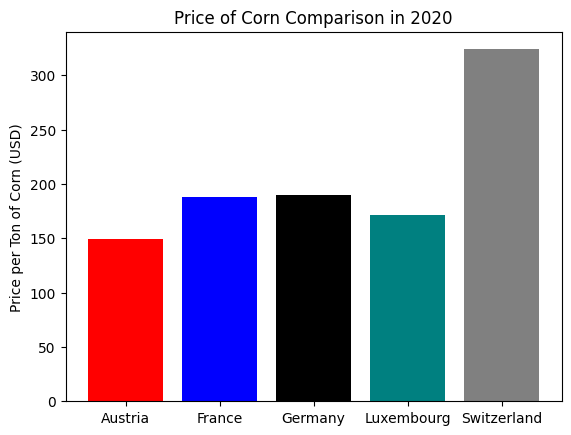

In [10]:
#this block of code creates a plot to show and compare the prices of corn in each country
colors = ['red', 'blue', 'black', 'teal', 'grey']
plt.bar(corn20['Area'], corn20['Value'], color = colors)
plt.ylabel('Price per Ton of Corn (USD)');
plt.title('Price of Corn Comparison in 2020');

As shown by the graph, Switzerland's corn prices in 2020 were the highest and the other four were relatively close to one another. Austria had the cheapest price of corn at around $150 for a ton of corn.

In [11]:
#the next few blocks of code fit a curve to the data and plot it
def line(x, A, B):
    return A*x+B

In [12]:
#curve fit for Austria
best_fit_parameters, just_ignore = curve_fit(line, austria['Year'], austria['Value'])

aus_A_exp = best_fit_parameters[0]
aus_B_exp = best_fit_parameters[1]

austria_exp = line(austria['Year'], aus_A_exp, aus_B_exp)

#curve fit for France
best_fit_parameters, just_ignore = curve_fit(line, france['Year'], france['Value'])

fra_A_exp = best_fit_parameters[0]
fra_B_exp = best_fit_parameters[1]

france_exp = line(france['Year'], fra_A_exp, fra_B_exp)

#curve fit for Germany
best_fit_parameters, just_ignore = curve_fit(line, germany['Year'], germany['Value'])

ger_A_exp = best_fit_parameters[0]
ger_B_exp = best_fit_parameters[1]

germany_exp = line(germany['Year'], ger_A_exp, ger_B_exp)

#curve fit for Switzerland
best_fit_parameters, just_ignore = curve_fit(line, switzerland['Year'], switzerland['Value'])

swi_A_exp = best_fit_parameters[0]
swi_B_exp = best_fit_parameters[1]

switzerland_exp = line(switzerland['Year'], swi_A_exp, swi_B_exp)

#curve fit for Switzerland
best_fit_parameters, just_ignore = curve_fit(line, luxembourg['Year'], luxembourg['Value'])

lux_A_exp = best_fit_parameters[0]
lux_B_exp = best_fit_parameters[1]

luxembourg_exp = line(luxembourg['Year'], lux_A_exp, lux_B_exp)


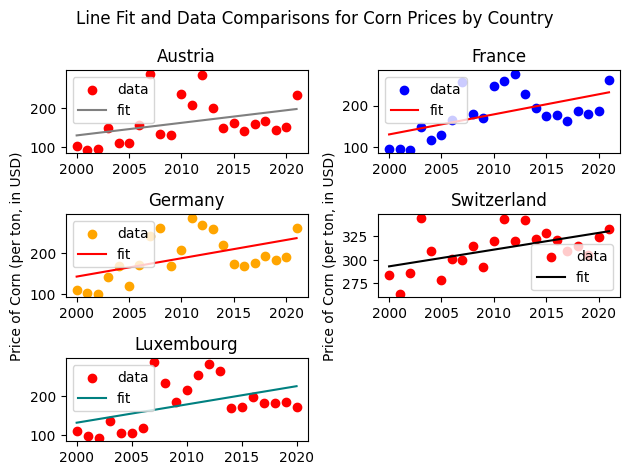

In [13]:
#similar to the subplots above, this time with the fitted line added to the plots
plt.suptitle('Line Fit and Data Comparisons for Corn Prices by Country')

plt.subplot(3,2,1)
plt.scatter(austria['Year'], austria['Value'], label = "data", color = 'red')
plt.plot(austria['Year'], austria_exp, color = "grey", label = "fit")
plt.title('Austria')
plt.legend()

plt.subplot(3,2,2)
plt.scatter(france['Year'], france['Value'], label = "data", color = 'blue')
plt.plot(france['Year'], france_exp, color = "red", label = "fit")
plt.title('France')
plt.legend()

plt.subplot(3,2,3)
plt.scatter(germany['Year'], germany['Value'], label = "data", color = 'orange')
plt.plot(germany['Year'], germany_exp, color = "red", label = "fit")
plt.title('Germany')
plt.ylabel('Price of Corn (per ton, in USD)')
plt.legend()

plt.subplot(3,2,4)
plt.scatter(switzerland['Year'], switzerland['Value'], label = "data", color = 'red')
plt.plot(switzerland['Year'], switzerland_exp, color = "black", label = "fit")
plt.title('Switzerland')
plt.ylabel('Price of Corn (per ton, in USD)')
plt.legend()

plt.subplot(3,2,5)
plt.scatter(luxembourg['Year'], luxembourg['Value'], label = "data", color = 'red')
plt.plot(luxembourg['Year'], luxembourg_exp, color = "teal", label = "fit")
plt.title('Luxembourg')
plt.legend()

plt.tight_layout()

From the fitted lines above, we can see that Switzerland has the smallest slope, leading to an assumption that in 2070 their prices of corn may not increase as much as other countries do. France seems to have a pretty strong incline so they will likely have their corn prices increase the most. 

In [14]:
#this block of code predicts what the price of corn will be for each country in the future
#predict function that returns estimated price based on fitted line
def predict(a,b,x):
    y = a*x + b
    return y

#these lines run the predict function for each country and rounds the values
fut_aus = predict(aus_A_exp, aus_B_exp, 2070)
fut_fra = predict(fra_A_exp, fra_B_exp, 2070)
fut_ger = predict(ger_A_exp, ger_B_exp, 2070)
fut_swi = predict(swi_A_exp, swi_B_exp, 2070)
fut_lux = predict(lux_A_exp, lux_B_exp, 2070)
fut_aus = round(fut_aus, 2)
fut_fra = round(fut_fra, 2)
fut_ger = round(fut_ger, 2)
fut_swi = round(fut_swi, 2)
fut_lux = round(fut_lux, 2)

#these lines print the predicted price of corn for each country
print('In Austria, the predicted price of corn per ton in 2070 is', fut_aus, 'USD.')
print('In France, the predicted price of corn per ton in 2070 is', fut_fra, 'USD.')
print('In Germany, the predicted price of corn per ton in 2070 is', fut_ger, 'USD.')
print('In Switzerland, the predicted price of corn per ton in 2070 is', fut_swi, 'USD.')
print('In Luxembourg, the predicted price of corn per ton in 2070 is', fut_lux, 'USD.')

In Austria, the predicted price of corn per ton in 2070 is 356.37 USD.
In France, the predicted price of corn per ton in 2070 is 469.76 USD.
In Germany, the predicted price of corn per ton in 2070 is 457.82 USD.
In Switzerland, the predicted price of corn per ton in 2070 is 418.29 USD.
In Luxembourg, the predicted price of corn per ton in 2070 is 460.76 USD.


The predictions show that most of the prices of corn will double from now to 2070. France now has the highest prices for corn. Because Switzerland's prices from 2000-2020 did not increase as much, their fitted line was not as steep, hence the reason why their prices did not rise as much. Austria stays at the cheapest price for corn at $356.37. 

In [15]:
#the next couple blocks of code visualize the predictions of corn prices in each country and compare them to the data
data = {'country': ['Austria', 'France', 'Germany','Luxembourg', 'Switzerland'],
       'value': [fut_aus, fut_fra, fut_ger, fut_lux, fut_swi]}

df = pd.DataFrame(data)

/var/folders/b1/4__1bv854vsbyyxy9y6g1smc0000gn/T/ipykernel_39360/2463688575.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,1,1)


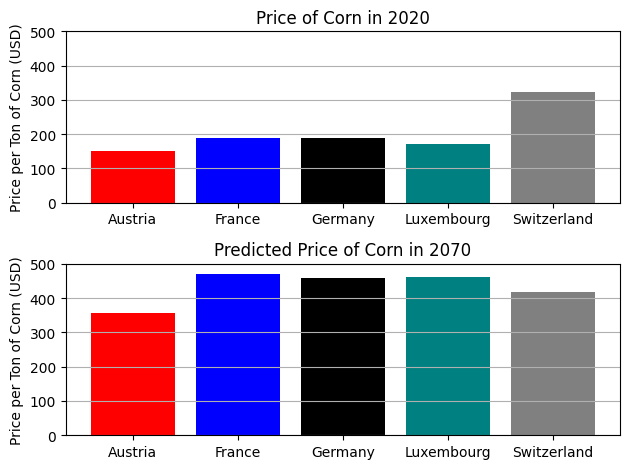

In [16]:
#the folowing chunk of code creates a subplots with bar charts
#to compare the prices in 2020 to predictions for 2070
colors = ['red', 'blue', 'black', 'teal', 'grey']

plt.title('Comparing 2020 Values to 2070 Predictions by Country')
plt.subplot(2,1,1)
plt.bar(corn20['Area'], corn20['Value'], color = colors)
plt.ylabel('Price per Ton of Corn (USD)')
plt.title('Price of Corn in 2020')
plt.ylim(0,500)
plt.grid(axis='y')

plt.subplot(2,1,2)
plt.bar(df['country'], df['value'], color = colors)
plt.ylabel('Price per Ton of Corn (USD)')
plt.title('Predicted Price of Corn in 2070')
plt.ylim(0,500)
plt.grid(axis='y')

plt.tight_layout()

As seen by the graphs, Switzerland is no longer the most expensive corn seller, it is now France with Germany and Luxembourg close behind. Austria stays as a cheaper option for corn. 

## Results

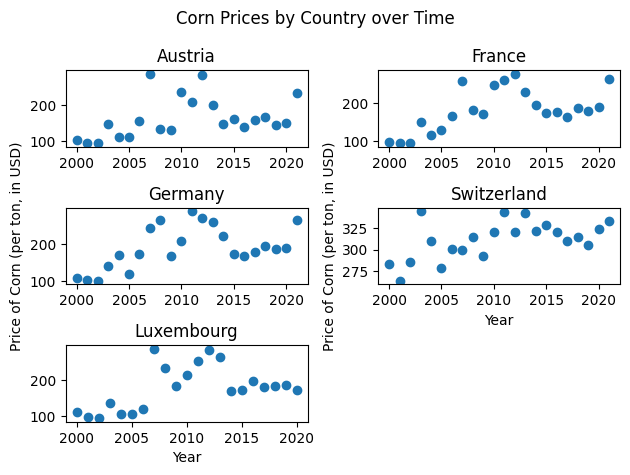

In [17]:
#this block of code creates a subplot of each of the countries corn prices over time with the data given
plt.suptitle('Corn Prices by Country over Time')
plt.subplot(3,2,1)
plt.scatter(austria['Year'], austria['Value'])
plt.title('Austria')
plt.subplot(3,2,2)
plt.scatter(france['Year'], france['Value'])
plt.title('France')
plt.subplot(3,2,3)
plt.scatter(germany['Year'], germany['Value'])
plt.title('Germany')
plt.ylabel('Price of Corn (per ton, in USD)')
plt.subplot(3,2,4)
plt.scatter(switzerland['Year'], switzerland['Value'])
plt.title('Switzerland')
plt.ylabel('Price of Corn (per ton, in USD)')
plt.xlabel('Year')
plt.subplot(3,2,5)
plt.scatter(luxembourg['Year'], luxembourg['Value'])
plt.title('Luxembourg')
plt.xlabel('Year')
plt.tight_layout()

After diving into the data given, we get a glimpse as to what might happen to the prices of corn overtime. We see that it will rise with some countries increasing faster than others. Once we saw what kind of data we were working with, we were able to fit lines to each of the countries to continue to build on the predicting process.

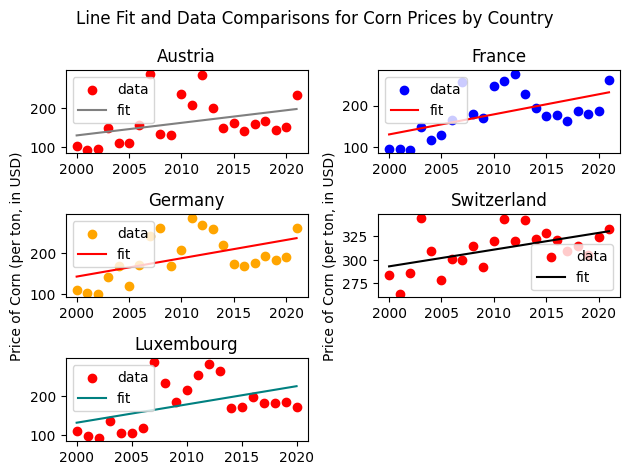

In [18]:
#similar to the subplots above, this time with the fitted line added to the plots
plt.suptitle('Line Fit and Data Comparisons for Corn Prices by Country')
plt.subplot(3,2,1)
plt.scatter(austria['Year'], austria['Value'], label = "data", color = 'red')
plt.plot(austria['Year'], austria_exp, color = "grey", label = "fit")
plt.title('Austria')
plt.legend()
plt.subplot(3,2,2)
plt.scatter(france['Year'], france['Value'], label = "data", color = 'blue')
plt.plot(france['Year'], france_exp, color = "red", label = "fit")
plt.title('France')
plt.legend()
plt.subplot(3,2,3)
plt.scatter(germany['Year'], germany['Value'], label = "data", color = 'orange')
plt.plot(germany['Year'], germany_exp, color = "red", label = "fit")
plt.title('Germany')
plt.ylabel('Price of Corn (per ton, in USD)')
plt.legend()
plt.subplot(3,2,4)
plt.scatter(switzerland['Year'], switzerland['Value'], label = "data", color = 'red')
plt.plot(switzerland['Year'], switzerland_exp, color = "black", label = "fit")
plt.title('Switzerland')
plt.ylabel('Price of Corn (per ton, in USD)')
plt.legend()
plt.subplot(3,2,5)
plt.scatter(luxembourg['Year'], luxembourg['Value'], label = "data", color = 'red')
plt.plot(luxembourg['Year'], luxembourg_exp, color = "teal", label = "fit")
plt.title('Luxembourg')
plt.legend()
plt.tight_layout()

The fitted lines are an important part of this process as they guage how quickly corn prices are increasing in each country. Over the last 20 years, France has had the sharpest increase whereas Switzerland has not gone up much. From these graphs, we can hypothesize what will happen over the next 50 years. However, we continued to dive deeper into the numbers and found greater evidence in the next step of the process. 

/var/folders/b1/4__1bv854vsbyyxy9y6g1smc0000gn/T/ipykernel_39360/186620299.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,1,1)


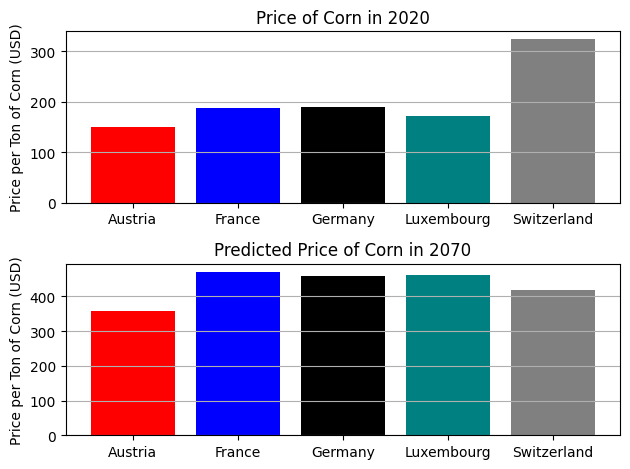

In [19]:
#the folowing chunk of code creates a subplots with bar charts
#to compare the prices in 2020 to predictions for 2070
colors = ['red', 'blue', 'black', 'teal', 'grey']

plt.title('Comparing 2020 Values to 2070 Predictions by Country')
plt.subplot(2,1,1)
plt.bar(corn20['Area'], corn20['Value'], color = colors)
plt.ylabel('Price per Ton of Corn (USD)')
plt.title('Price of Corn in 2020')
plt.grid(axis='y')

plt.subplot(2,1,2)
plt.bar(df['country'], df['value'], color = colors)
plt.ylabel('Price per Ton of Corn (USD)')
plt.title('Predicted Price of Corn in 2070')
plt.grid(axis='y')

plt.tight_layout()

As seen in the comparison above, prices of corn all around increased nearly two times the price in 2020. Our hypothesis earlier of France and Switzerland turned out to be a good one as France's predicted price of corn became the highest in 2070 and Switzerland went from clearing all countries to being the second cheapest option. Austria continues it's dominance as the cheapest option for corn, staying consumer friendly for 50 straight years. 

## Synthesis and Discussion

#### Review

Based on the results from the project, I am not surprised at the final predictions of the corn prices. Something that I have learned is Switzerland might have a really good economy as their actual corn prices increased at such a low rate over the last 20 years. If I am ever in the market for a ton of corn in my lifetime, I might turn towards Austria to get the best deal. 

#### Obstacles

I think one of the biggest limitations in this project was only having 20 years worth of data. Twenty data points is a good start, however having forty or fifty would have resulted in better line fits to the data, meaning better predictions. It also did not help that the limited data included a recession for a few of the data points as it spiked the prices for a year or two, leading to likely higher sloped lines. This resulted in higher predictions than what may be the actual values in 2070. If I was to do this project again, I would search for a dataset with more years in it. I would also consider doing more countries, maybe from different continents to compare corn prices around the world. 

#### Final Answers

##### What will the prices of corn look like from countries in Western Europe in 50 years?

Austria will stay the cheapest option for corn. Although Switzerland started off as the most expensive by a long shot, their increase overtime lead to them being the second cheapest country for corn in 2070. Finally, France increased the most and finished as the most expensive, followed closely behind by Germany and Luxembourgh. 